# Histogram plot

### random numbers


First import libraries

In [1]:
%matplotlib inline
import numpy as np # import numpy library as np
import math # use mathematical functions defined by the C standard
import matplotlib.pyplot as plt # import pyplot library as plt
plt.style.use('ggplot') # use "ggplot" style for graphs

### Initialization of the random number generator

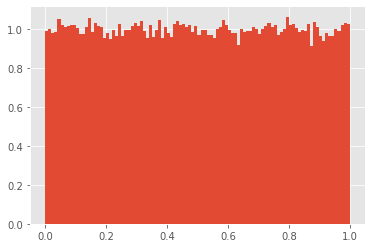

In [2]:
N = 100000 # size of Ran
np.random.seed(666) # initialization of the random number generator
Ran = np.random.rand(N) # generate random sequence and store it as Ran
# plot normalized histogram of Ran using 100 bins
plt.hist(Ran,bins=100,density=True)
plt.show() # show plot

In [3]:
np.random.seed(666) # initialization of the random number generator
Ran = np.random.rand(2) # generate random sequence and store it as Ran
Ran

array([0.70043712, 0.84418664])

In [4]:
np.random.seed?


### Trajectory plot, random walk

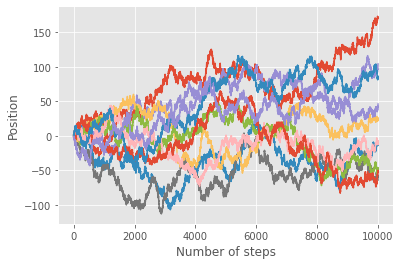

In [5]:
NSTEP = 10000 # number of random steps
plt.xlabel("Number of steps") # name of x axis
plt.ylabel("Position") # name of y axis
for nseed in range(10): # generate 10 random walks
    # initialize random step generator with different nseeds
    np.random.seed(nseed)
    # generate random sequencies of NSTEP +1/-1 steps
    step = np.random.choice([-1,1],NSTEP)
    # calculate position of random walk at each step
    position = np.cumsum(step)
    plt.plot(position) # plot position(step) vs. step

# Normal / Gaussian distribution

## Generate random numbers: $x_0, x_1, \cdots, x_N$

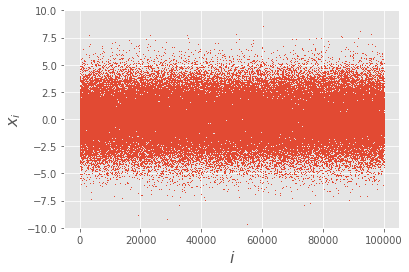

In [6]:
ave = 0.0 # set average
std = 2.0 # set standard deviation
N = 100000 # number of generated random numbers
np.random.seed(0) # initialize the random number generator with seed=0
X = ave+std*np.random.randn(N) # generate random sequence from standard normal and store it as X
plt.ylim(-10,10) # set y-range
plt.xlabel(r'$i$',fontsize=16) # set x-label
plt.ylabel(r'$x_i$',fontsize=16) # set y-label
plt.plot(X,',') # plot x_i vs. i (i=1,2,...,N) with dots
plt.show() # draw plots

## Compare the distribution with the normal distribution function

\begin{equation}
P(x)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{(x-\langle X \rangle)^2}{2\sigma^2}\right]
\end{equation}

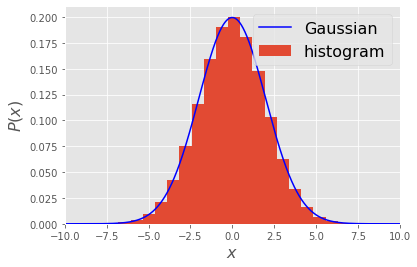

In [7]:
plt.hist(X,bins=25,density=True) # plot normalized histogram of R using 25 bins
x = np.arange(-10,10,0.01) # create array of x from 0 to 1 with increment 0.01
y = np.exp(-(x-ave)**2/(2*std**2))/np.sqrt(2*np.pi*std**2) # create array of y as y=1
plt.xlim(-10,10) # set x-range
plt.plot(x,y,color='b') # plot y vs. x with blue line
plt.xlabel(r'$x$',fontsize=16) # set x-label
plt.ylabel(r'$P(x)$',fontsize=16) # set y-label
plt.legend([r'Gaussian',r'histogram'], fontsize=16) # set legends
plt.show() # display plots

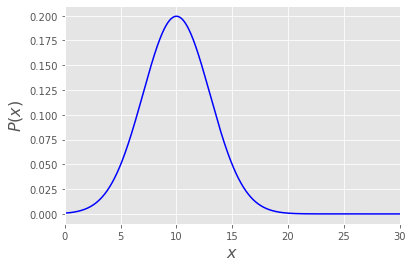

In [8]:
# plt.hist(X,bins=25,normed=True) # plot normalized histogram of R using 25 bins
x = np.arange(0,30,0.01) # create array of x from 0 to 1 with increment 0.01
y = np.exp(-(x-10)**2/(2*3**2))/np.sqrt(2*np.pi*std**2) # create array of y as y=1
plt.xlim(0,30) # set x-range
plt.plot(x,y,color='b') # plot y vs. x with blue line
plt.xlabel(r'$x$',fontsize=16) # set x-label
plt.ylabel(r'$P(x)$',fontsize=16) # set y-label
# plt.legend([r'Gaussian',r'histogram'], fontsize=16) # set legends
plt.show() # display plots

## Calculate the auto-correlation function $\varphi(i)$

### Definition

\begin{equation}
\varphi(i)=\frac{1}{N}\sum_{j=1}^{N} \left(x_j - \langle X\rangle\right)\left(x_{i+j}-\langle X\rangle\right)
\end{equation}

\begin{equation}
\varphi(i=0)=\frac{1}{N}\sum_{j=1}^{N} \left(x_j - \langle X\rangle\right)^2=\langle x_j - \langle X\rangle\rangle^2=\sigma^2
\end{equation}

\begin{equation}
\varphi(i\ne 0)= \langle x_j - \langle X\rangle\rangle\langle x_{i\ne j} - \langle X\rangle\rangle=0\hspace{5mm}
(\rightarrow{\rm White\ noise})\hspace{-12mm}
\end{equation}

\sigma^2  = 4.0


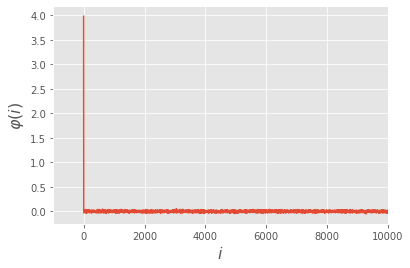

In [9]:
def auto_correlate(x):
    cor = np.correlate(x,x,mode="full")
    return cor[N-1:]
c = np.zeros(N)
c = auto_correlate(X-ave)/N
plt.plot(c)
plt.xlim(-1000,10000)
plt.xlabel(r'$i$',fontsize=16)
plt.ylabel(r'$\varphi(i)$',fontsize=16)
print('\sigma^2  =',std**2)
plt.show()

# Binomial distribution

## Generate random numbers, $n_0, n_1, \cdots, n_N$

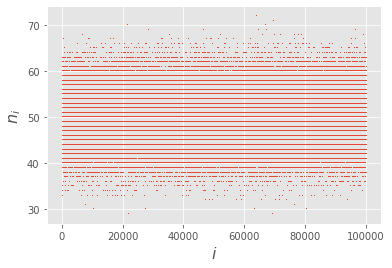

In [10]:
p = 0.5 # set p, propability to obtain "head" from a coin toss
M = 100 # set M, number of tosses in one experiment
N = 100000 # number of experiments
np.random.seed(0) # initialize the random number generator with seed=0
X = np.random.binomial(M,p,N) # generate the number of heads after M tosses, N times, and store it as X
plt.xlabel(r'$i$',fontsize=16) # set x-label
plt.ylabel(r'$n_i$',fontsize=16) # set y-label
plt.plot(X,',') # plot n_i vs. i (i=1,2,...,N) with dots
plt.show() # draw plots

## Compare the distribution with the Binomial distribution function

\begin{equation}
P(n)=\frac{M!}{n!(M-n)!}p^{n}(1-p)^{M-n}
\end{equation}

\begin{equation}
\langle n \rangle=Mp
\end{equation}

\begin{equation}
\sigma^2=Mp(1-p)
\end{equation}

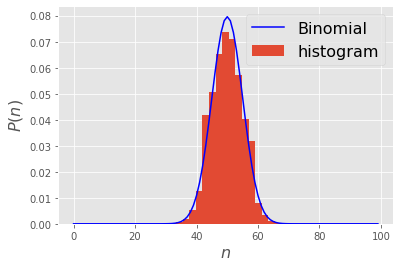

In [11]:
def binomial(n,m,p):
    comb=math.factorial(m)/(math.factorial(n)*math.factorial(m-n))
    prob=comb*p**n*(1-p)**(m-n)
    return prob
plt.hist(X,bins=20,density=True) # plot normalized histogram of R using 22 bins
x = np.arange(M) # generate array of x values from 0 to 100, in intervals of 1
y = np.zeros(M) # generate array of y values, initialized to 0
for i in range(M):
    y[i]=binomial(i,M,p) # compute binomial distribution P(n), Eq. (D5)
plt.plot(x,y,color='b') # plot y vs. x with blue line
plt.xlabel(r'$n$',fontsize=16) # set x-label
plt.ylabel(r'$P(n)$',fontsize=16) # set y-label
plt.legend([r'Binomial',r'histogram'], fontsize=16) # set legends
plt.show() # display plots

## Calculate the auto-correlation function $\varphi(i)$

### Definition

\begin{equation}
\varphi(i)=\frac{1}{N}\sum_{j=1}^{N} \left(n_j - \langle n\rangle\right)\left(n_{i+j}-\langle n\rangle\right)
\end{equation}

\begin{equation}
\varphi(i=0)=\frac{1}{N}\sum_{j=1}^{N} \left(n_j - \langle n\rangle\right)^2=\langle n_j - \langle n\rangle\rangle^2=\sigma^2=Mp(1-p)
\end{equation}

\begin{equation}
\varphi(i\ne 0)= \langle n_j - \langle n\rangle\rangle\langle n_{i\ne j} - \langle n\rangle\rangle=0\hspace{8mm}
(\rightarrow{\rm White\ noise})\hspace{10mm}
\end{equation}

\sigma^2  = 25.0


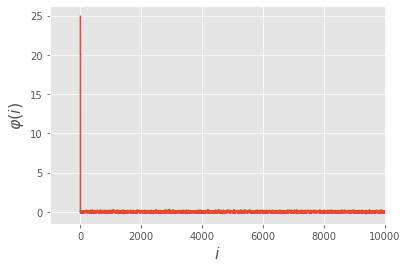

In [12]:
def auto_correlate(x):
    cor = np.correlate(x,x,mode="full")
    return cor[N-1:]
c = np.zeros(N)
c = auto_correlate(X-M*p)/N
plt.plot(c)
plt.xlim(-1000,10000)
plt.xlabel(r'$i$',fontsize=16)
plt.ylabel(r'$\varphi(i)$',fontsize=16)
print('\sigma^2  =',M*p*(1-p))
plt.show()

# Poisson distribution

## Generate random numbers, $n_0, n_1, \cdots, n_N$

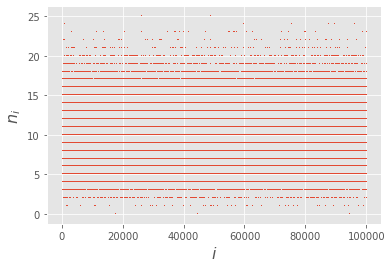

In [13]:
a = 10.0 # set a, the expected value
N = 100000 #  number of generated random numbers
np.random.seed(0) # initialize the random number generator with seed=0
X = np.random.poisson(a,N) # generate randon numbers from poisson distribution
plt.xlabel(r'$i$',fontsize=16) # set x-label
plt.ylabel(r'$n_i$',fontsize=16) # set y-label
plt.plot(X,',') # plot n_i vs. i (i=1,2,...,N) with dots
plt.show() # draw plots

## Compare the distribution with the binomial distribution function 

\begin{equation}
P(n)=\frac{a^n e^{-a}}{n!}
\end{equation}

\begin{equation}
\langle n \rangle=a
\end{equation}

\begin{equation}
\sigma^2=a
\end{equation}

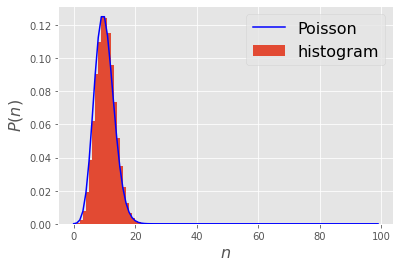

In [14]:
def poisson(n,a):
    prob=a**n*np.exp(-a)/math.factorial(n)
    return prob
plt.hist(X,bins=25,density=True) # plot normalized histogram of X using 25 bins
x = np.arange(M) # generate array of x values from 0 to 100, in intervals of 1
y = np.zeros(M) # generate array of y values, initialized to zero
for i in range(M):
    y[i]=poisson(i,a) # Compute Poisson distribution for n, Eq. (D11)
plt.plot(x,y,color='b') # plot y vs. x with blue line
plt.xlabel(r'$n$',fontsize=16) # set x-label
plt.ylabel(r'$P(n)$',fontsize=16) # set y-label
plt.legend([r'Poisson',r'histogram'], fontsize=16) # set legends
plt.show() # display plots